# Лабораторна робота №4.                                                                                                        Нейронні мережі. Побудова ансамблів.
1. Взяти данi з роботи № 2 згiдно з варiантом. Представити данi графiчно. 

2. Побудувати моделi нейронних мереж, використовуючи класи 
MLPClassifier або MLPRegressor, для класифiкацiї або регресiї згi дно з варiантом.
Дослiдити вплив рiзних параметрiв MLPClassifier або MLPRegressor, згiдно з варiантом (!), на результат класифiкацiї/ре-гресiї:

• Побудувати рiзнi архiтектури нейронних мереж шляхом варiювання значень параметру hidden_layer_sizes. Порiвняти результати класи-фiкацiї/ регресiї, отриманi на основi рiзних архiтектур.

• Використати рiзнi методи розрахунку ваг (параметр solver); порiвняти результати, отриманi методами ‘lbfgs’, ‘sgd’ та ‘adam’.

• Використати рiзнi функцiї активацiї для скритого шару; дослiдити їх вплив на результат.

• Дослiдити вплив рiзних значень параметру регуляризацiї alpha класу MLPClassifier на результат класифiкацiї.

• Дослiдити вплив рiзних методiв визначення learning_rate на результат класифiкацiї (для solver=’sgd’).

• Розглянути рiзнi значення max_iter, дослiдити їх вплив на результат.

• Використати early_stopping=True.

• Використати warm_start=True.

• Вивести значення функцiї втрат на декiлькох перших i декiлькох остан-нiх iтерацiях - у кожному варiантi.

• Вивести значення середньої точностi класифiкацiї/регресiї на навчальнiй i тестовiй множинах, використовуючи score - у кожному варiантi.

3. Виконати прогнози на основi моделей нейронних мереж. 

4. Зробити висновки про якiсть роботи моделей нейронних мереж на дослi джених даних. В задачах класифiкацiї для кожної навчальної ви-бiрки вибрати найкращу модель за критерiями якостi: 
• матриця неточностей (confusion matrix), 
• точнiсть (precision), 
• повнота (recall), 
• мiра F1 (F1 score), 
• ROC-крива, показник AUC. 

5. Побудувати ансамблi моделей, використовуючи наступнi методи (згi дно з варiантом !): 
        • VotingClassifier. Розглянути рiзнi значення параметрiв voting та weights. 

6. Побудувати ансамблi AdaBoost, Bagging, Stacking, Voting (згiдно з варiантом !) на основi найпростiших моделей: 
   • В якостi base_estimator / estimators використати одну/ декiль ка найпростiших моделей заданих за варiантом: дерев рiшень, svm, нейронних мереж тощо. Порiвняти значення мiр F1_score та AUC або R2 для ансамблiв та окремих моделей, якi утворюють ан-самбль (модель base_estimator / моделi estimators). Порiвняти декiль ка ансамблiв, якi утворенi на основi одних estimators i вiдрiзня ються значеннями параметрiв. 

   • Побудувати графiки залежностi значень помилок класифiкацiї accuracy_score або zero_one_loss вiд значення n_estimators для до-слiджених ансамблiв та окремих моделей на однiй координатнiй вiсi. 

   • В задачах класифiкацiї побудувати графiки залежностi значень мiри F1_score вiд значення n_estimators для дослiджених ан-самблiв та окремих моделей на однiй координатнiй вiсi. Ана-логiчнi графi ки побудувати для AUC. Графiки для окремих мо-делей, очевидно, будуть горизонтальними прямими. 
В задачах регресiї побудувати графiки залежностi значень R2 вiд значення n_estimators. 

   • В задачах регресiї графiчно вiдобразити прогнози на основi base_estimator та на основi дослiджених ансамблiв, а також на вчальнi приклади на однiй координатнiй вiсi. 

   • В задачах класифiкацiї вiдобразити границi рiшень decision boundaries на основi base_estimator / estimators та на основi до-слiджених ансамблiв. 

7. Побудувати ансамблi на основi найкращої моделi / моделей нейронних ме-реж, знайдених на попереднiх етапах даної роботи, та найкращої моделi / мо-делей, знайдених у роботi №2. 
Порiвняти результати класифiкацiї, значення мiр F1_score та AUC для ансам-блiв та окремих моделей, якi утворюють цi ансамблi. В задачах регресiї порiвняти значення R2 для ансамблiв та окремих моделей, якi утворюють цi ансамблi.

#### 6 варіант

BaggingClassifier. Розглянути рiзнi значення параметрiв max_samples та bootstrap.
Побудувати моделi нейронних мереж:
• Використати рiзнi функцiї активацiї для скритого шару та рiзнi значення
learning_rate, дослiдити їх вплив на результат класифiкацiї.
• Використати early_stopping=True.
Додатково VotingClassifier.


In [1]:
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt
from sklearn.model_selection import GridSearchCV

import numpy as np
import scikitplot.metrics as skplt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


### 1. Взяти данi з роботи № 2 згiдно з варiантом. Представити данi графiчно.

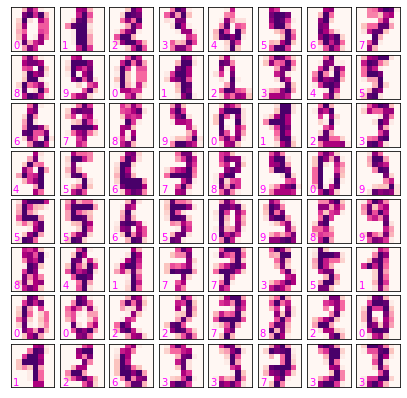

In [3]:
X_moons, y_moons = make_moons(n_samples=100, noise=0.15)
digits_ = load_digits() 
def show_digits(digits):
    fig, axes = plt.subplots(8, 8, figsize=(7, 7), subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(digits.images[i], cmap='RdPu', interpolation='nearest')
        ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='fuchsia')
    plt.show()


show_digits(digits_)

In [4]:
#pip install scikit-plot

### 2. Розбити данi на навчальний, перевiрочний та тестовий набори.
 Розбіємо данi на навчальний i перевiрочний набори. Оскільки багатошаровий персептрон чутливий до розкиду даних, вхiдних даних. Данi приведимо до нульового середнього та одиничної дисперсiї.

In [5]:
X_digits = digits_.data
y_digits = digits_.target
# data preprocessing
X_moons = StandardScaler().fit_transform(X_moons)
X_digits = StandardScaler().fit_transform(X_digits)
# create train and test samples
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits, train_size=0.8)
X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(X_moons, y_moons, train_size=0.8)

### 3. Побудувати моделi нейронних мереж, використовуючи класи MLPClassifier для класифiкацiї.
### 4. Виконати прогнози на основi моделей нейронних мереж. 
### 5 Оцiнити якiсть моделей нейронних мереж в задачах класифiкацiї. Зробити висновки про якiсть роботи моделей нейронних мереж на тестових даних.

In [6]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning


In [7]:

def create_matrix(curr_model, x, y_test,f):
    y_predict = curr_model.predict(x)

    cm = mt.confusion_matrix(y_test, y_predict)
    score = curr_model.score(x, y_test)
    d = mt.precision_score(y_test, y_predict, average='micro')
    if (f == 1):
        plt.figure(figsize=(9, 9))
        sns.heatmap(cm, annot=True, fmt=".3f", square=True)
        plt.ylabel("Actual label")
        plt.xlabel("Predicted label")
        plt.title(f"Accuracy Score:  {score}", size=15)

        plt.show()

        print('Precision-score: ', mt.precision_score(y_test, y_predict, average='micro'))
        print('Recall-score: ', mt.recall_score(y_test, y_predict, average='micro'))
        print('F1-score: ', mt.f1_score(y_test, y_predict, average='micro'))

    return d

In [8]:

def estimate(curr_model, x, y_true, num_classes,f):

    d=create_matrix(curr_model, x, y_true,f)
    if (f == 1):
        if num_classes == 2:
            pr_curve = mt.plot_precision_recall_curve(curr_model, x, y_true)
            pr_curve.ax_.set_title('Precision-Recall curve')
            plt.show()

            roc_curve_moons = mt.plot_roc_curve(curr_model, x, y_true)
            roc_curve_moons.ax_.set_title('ROC curve')
            plt.show()

        if num_classes > 2:
            y_probs = curr_model.predict_proba(x)
            skplt.plot_precision_recall(y_true, y_probs)
            plt.show()

            skplt.plot_roc(y_true, y_probs)
            plt.show()



    return d

В даній роботі розглянему параметри activation, learning_rate, та early_stopping.

**activation** - Функція активації 
'identity’, активація без операцій, корисна для реалізації лінійного вузького місця, повертає f(x) = x

‘logistic’, логістична сигмовидна функція, повертає f(x) = 1 / (1 + exp(-x)).

‘tanh’, гіперболічна функція tan, повертає f(x) = tanh(x).

‘relu’,виправлена ​​лінійна одинична функція, повертає  f(x) = max(0, x)

**learning_rate** - Графік швидкості навчання для оновлення ваг.
«constant» — це постійна швидкість навчання, задана параметром, задана параметром «learning_rate_init».
'invscaling' поступово зменшує швидкість навчання на кожному кроці часу 't', використовуючи інверсний експонент масштабування 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)'adaptive' зберігає швидкість навчання постійною до 'learning_rate_init' до тих пір, поки втрата навчання продовжує зменшуватися. Кожного разу, коли дві послідовні епохи не знижують втрати при навчанні щонайменше на tol або не підвищують оцінку підтвердження щонайменше на tol, якщо ввімкнено early_stopping, поточна швидкість навчання ділиться на 5.

Використовується лише тоді, коли solver='sgd'.

**early_stopping** - параметр для використання раньої зупинки для припинення навчання, коли оцінка перевірки не покращується.

In [9]:

def create_models(x_train, y_train, x_test, y_test):
    hidden_layer_sizes = [(100, 50, 100)]
    max_iter = 10
    i = 0
    activation = ['identity', 'logistic', 'tanh', 'relu']
    early_stopping = [True, False]
    #early_stopping = [True]
    learning_rate = ['constant', 'invscaling', 'adaptive']

    for ear in early_stopping:
        print("--------",ear,"--------")
        list= []
        ear_list2 = []
        act_list2 = []
        learn_list2 = []

        for act in activation:
            for learn in learning_rate:
                mlp = MLPClassifier(max_iter=10, early_stopping=ear, activation=act, learning_rate=learn,
                                    solver='sgd').fit(x_train, y_train)
                #print(f'({ear},{act},{learn})')
                i = i + 1
                #print("----------------------------")
                d=estimate(mlp, x_test, y_test, 10,2)

                list.append(d)

                ear_list2.append(ear)
                act_list2.append(act)
                learn_list2.append( learn)
        list1 = np.array(list)
        max_a=np.argmax(list1)

        print(f'\t the best list for {ear}: ')
        e=ear_list2[max_a]
        print('\t ',"{", ear_list2[max_a],"|", act_list2[max_a], "|",learn_list2[max_a],"}")


        mlp_1 = MLPClassifier(max_iter=10, early_stopping=ear_list2[max_a], activation=act_list2[max_a], learning_rate=learn_list2[max_a],
                            solver='sgd').fit(x_train, y_train)
        estimate(mlp_1, x_test, y_test, 10, 1)



In [10]:

def create_models1(x_train, y_train, x_test, y_test):
    hidden_layer_sizes = [(100, 50, 100)]
    max_iter = 10
    i = 0
    activation = ['identity', 'logistic', 'tanh', 'relu']
    early_stopping = [True, False]
    #early_stopping = [True]
    learning_rate = ['constant', 'invscaling', 'adaptive']

    for act in activation:
        print("--------",act,"--------")
        list= []
        ear_list2 = []
        act_list2 = []
        learn_list2 = []

        for ear in early_stopping:
            for learn in learning_rate:
                mlp = MLPClassifier(max_iter=10, early_stopping=ear, activation=act, learning_rate=learn,
                                    solver='sgd').fit(x_train, y_train)
                #print(f'({ear},{act},{learn})')
                i = i + 1
                #print("----------------------------")
                d=estimate(mlp, x_test, y_test, 10,2)
                
                    



                list.append(d)

                ear_list2.append(ear)
                act_list2.append(act)
                learn_list2.append( learn)
        list1 = np.array(list)
        max_a=np.argmax(list1)

        print(f'\t the best list for {act}: ')
        e=ear_list2[max_a]
        print('\t ',"{", ear_list2[max_a],"|", act_list2[max_a], "|",learn_list2[max_a],"}")


        mlp_1 = MLPClassifier(max_iter=10, early_stopping=ear_list2[max_a], activation=act_list2[max_a], learning_rate=learn_list2[max_a],
                            solver='sgd').fit(x_train, y_train)
        estimate(mlp_1, x_test, y_test, 10, 1)
        estimate(mlp_1, x_train, y_train, 10, 0)
        
        print(f'\tLoss function at first 2 iterations :{mlp.loss_curve_[:2]} ')
        print(f'\tLoss function at last 2 iterations :{mlp.loss_curve_[-2:]} ')
        



In [11]:

def create_models2(x_train, y_train, x_test, y_test):
    hidden_layer_sizes = [(100, 50, 100)]
    max_iter = 10
    i = 0
    activation = ['identity', 'logistic', 'tanh', 'relu']
    early_stopping = [True, False]
    #early_stopping = [True]
    learning_rate = ['constant', 'invscaling', 'adaptive']

    for learn in learning_rate:
        print("--------",learn,"--------")
        list= []
        ear_list2 = []
        act_list2 = []
        learn_list2 = []

        for ear in early_stopping:
            for act in activation:
                mlp = MLPClassifier(max_iter=10, early_stopping=ear, activation=act, learning_rate=learn,
                                    solver='sgd').fit(x_train, y_train)
                #print(f'({ear},{act},{learn})')
                i = i + 1
                #print("----------------------------")
                d=estimate(mlp, x_test, y_test, 10,2)

                list.append(d)

                ear_list2.append(ear)
                act_list2.append(act)
                learn_list2.append( learn)
        list1 = np.array(list)
        max_a=np.argmax(list1)

        print(f'\t the best list for {learn}: ')
        e=ear_list2[max_a]
        print('\t ',"{", ear_list2[max_a],"|", act_list2[max_a], "|",learn_list2[max_a],"}")


        mlp_1 = MLPClassifier(max_iter=10, early_stopping=ear_list2[max_a], activation=act_list2[max_a], learning_rate=learn_list2[max_a],
                            solver='sgd').fit(x_train, y_train)
        

        estimate(mlp_1, x_test, y_test, 10, 1)
        



# early_stopping 

-------- True --------
	 the best list for True: 
	  { True | identity | adaptive }
Precision-score:  0.75
Recall-score:  0.75
F1-score:  0.75
-------- False --------
	 the best list for False: 
	  { False | identity | adaptive }
Precision-score:  0.7111111111111111
Recall-score:  0.7111111111111111
F1-score:  0.7111111111111111


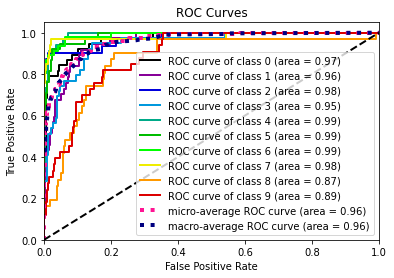

In [12]:
create_models(X_digits_train, y_digits_train, X_digits_test, y_digits_test)

При не одноразовій прогонці early_stopping = ***False*** в більшості показувало кращі результати.  Можемо зробити висновок, що за early_stopping = *****False***** значення трохи краще ніж при ***True*** 

# **activation+loss function**

-------- identity --------
	 the best list for identity: 
	  { False | identity | constant }
Precision-score:  0.7972222222222223
Recall-score:  0.7972222222222223
F1-score:  0.7972222222222222
	Loss function at first 2 iterations :[2.718307229553423, 2.4552530765100107] 
	Loss function at last 2 iterations :[0.9851335468014873, 0.9062143425867514] 
-------- logistic --------
	 the best list for logistic: 
	  { True | logistic | adaptive }
Precision-score:  0.1111111111111111
Recall-score:  0.1111111111111111
F1-score:  0.1111111111111111
	Loss function at first 2 iterations :[2.338844581866774, 2.32417682042074] 
	Loss function at last 2 iterations :[2.240007568915714, 2.231427167692595] 
-------- tanh --------
	 the best list for tanh: 
	  { False | tanh | constant }
Precision-score:  0.6472222222222223
Recall-score:  0.6472222222222223
F1-score:  0.6472222222222223
	Loss function at first 2 iterations :[2.616740615653646, 2.492291831889326] 
	Loss function at last 2 iterations :[1.4

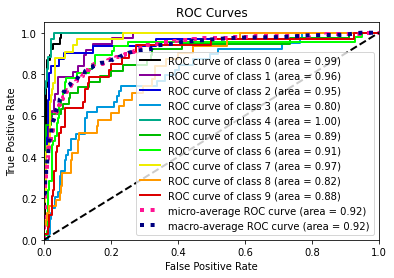

In [13]:
create_models1(X_digits_train, y_digits_train, X_digits_test, y_digits_test)

Можемо зробити висновок, що за ***identity*** значення значно краще за *relu, logistic* та трохи краще *tanh*

# **learning_rate**

-------- constant --------
	 the best list for constant: 
	  { True | identity | constant }
Precision-score:  0.7805555555555556
Recall-score:  0.7805555555555556
F1-score:  0.7805555555555554
-------- invscaling --------
	 the best list for invscaling: 
	  { True | identity | invscaling }
Precision-score:  0.2777777777777778
Recall-score:  0.2777777777777778
F1-score:  0.2777777777777778
-------- adaptive --------
	 the best list for adaptive: 
	  { False | identity | adaptive }
Precision-score:  0.7666666666666667
Recall-score:  0.7666666666666667
F1-score:  0.7666666666666667


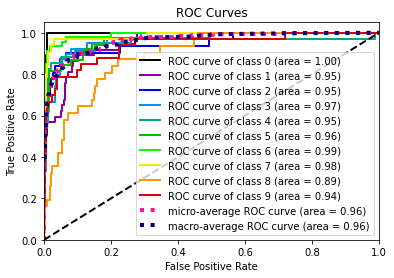

In [14]:
create_models2(X_digits_train, y_digits_train, X_digits_test, y_digits_test)

Можемо зробити висновок, що за ***adaptive*** значення значно краще за *invscaling* та трохи краще *constant*

**Знайдемо за допомогою решітчатого пошуку GridSearch найкращу модель**

In [15]:
from sklearn.model_selection import GridSearchCV
'''parameters_d = [{
               "activation": ['identity', 'logistic', 'tanh', 'relu'],
               "early_stopping": [True,False],
               "solver": ['sgd'],   
               "learning_rate": ['constant', 'invscaling', 'adaptive']
              
}]'''
parameters_d = [{"hidden_layer_sizes": [(50, 100, 50), (100, 50, 100)],
               "activation": ['identity', 'logistic', 'tanh', 'relu'],
               "early_stopping": [True,False],
               "max_iter": [10,12,20],
               "solver": ['sgd'],
               "alpha": [10**(i) for i in range(-3, 3)],
               "learning_rate": ['constant', 'invscaling', 'adaptive']
              }]
grid1 = GridSearchCV(MLPClassifier(), parameters_d, cv=5)
grid1.fit(X_digits_train, y_digits_train)
grid1.best_params_
#print(grid1.fit(X_digits_train, y_digits_train))

    

{'activation': 'identity',
 'alpha': 0.01,
 'early_stopping': True,
 'hidden_layer_sizes': (100, 50, 100),
 'learning_rate': 'constant',
 'max_iter': 20,
 'solver': 'sgd'}

Precision-score:  0.9116214335421016
Recall-score:  0.9116214335421016
F1-score:  0.9116214335421016
Precision-score:  0.8916666666666667
Recall-score:  0.8916666666666667
F1-score:  0.8916666666666667


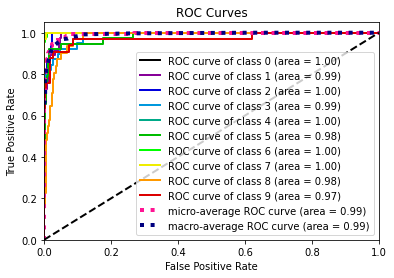

In [16]:
#model1_digits = grid1.best_estimator_
#grid1.best_params_


estimate(grid1, X_digits_train, y_digits_train, 10, 1)
estimate(grid1, X_digits_test, y_digits_test, 10, 1)

Як бачимо з результатів моделі нейронної мережі MLPClassifier дали доволі гарні результати. Метрики досить високі, а матриці неточностей виглядають добре. На тренувальних частинах вибірки результати майже не відрізняються, тому перенавчання, очевидно, немає. На даних даних використовувати нейромережу - небажано, оскільки кращу якість класифікації забезпечує логистична регресія з 2ї роботи.

## 6 Побудова ансамблів (BaggingClassifier.)
Розглянути рiзнi значення параметрiв max_samples та bootstrap.

Ідея бегінга (bootstrap aggregating) проста: кожен базовий алгоритм навчається на випадковій підмножині навчальної вибірки. В цьому випадку, навіть використовуючи одну модель алгоритмів, ми отримуємо різні базові алгоритми.
В ході беггінга відбувається наступне:
З безлічі вихідних даних випадковим чином відбирається кілька підмножин, що містять кількість прикладів, що відповідає кількості прикладів вихідного безлічі. Оскільки відбір здійснюється випадковим чином, то набір прикладів завжди буде різним: деякі приклади потраплять в кілька підмножин, а деякі не потраплять ні в одне. На основі кожної вибірки будується класифікатор.
Висновки: класифікатор агрегується (шляхом голосування або усереднення). Як і при бустінгу, очікується, що результат прогнозу агрегованого класифікатора буде набагато точніше результату прогнозу одиночної моделі на тому ж наборі даних.

Один із способів отримати різноманітний набір класифікаторів - це використовувати дуже різні алгоритми навчання. Інший підхід полягає у використанні одного і того ж алгоритму навчання для кожного предиктор, але тренувати їх на різних випадкових підмножинах навчального набору. Коли відбір проб виконується із заміною, цей метод називається мішуванням (скорочення від bootstrap aggregating). Коли відбір проб проводиться без заміни, це називається pasting.

Коли ми виконуємо вибірку із заміною, значення двох вибірок є незалежними. Практично це означає, що те, що ми отримуємо на першому, не впливає на те, що ми отримуємо на другому. Математично це означає, що коваріація між ними дорівнює нулю. При вибірці без заміни значення двох вибірок не є незалежними. Практично це означає, що те, що ми отримали за першу, впливає на те, що ми можемо отримати за другу. Математично це означає, що коваріація між ними не дорівнює нулю. Це ускладнює обчислення.

**max_samples** задає значення кількості навчальних вибірок
**bootstrap** відзначає чи отрисовані вибірка з заміною. Якщо False, то вибірка без заміни.

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [18]:
def variate_max_samples(max_samples, bootstrap, X_train, Y_train, X_test, Y_test):
    _, axes = plt.subplots(1, len(bootstrap), figsize=(15, 5))
    axes = list(axes)
    for bootstrap, axis in zip(bootstrap, axes):
        lr_hist_train, lr_hist_test = [], []
        for cur_sampl in max_samples:
            clf = BaggingClassifier(max_samples=cur_sampl, random_state=42, bootstrap=bootstrap)
            clf.fit(X_train, Y_train)
            y_pred = clf.predict(X_test)
            lr_hist_test.append(clf.score(X_test, Y_test))
            lr_hist_train.append(clf.score(X_train, Y_train))
        axis.set_title(f'{bootstrap} bootstrap', size='large')
        axis.plot(max_samples, lr_hist_train, c='r', label='train')
        axis.plot(max_samples, lr_hist_test, c='b', label='test')
        axis.set_xlabel('max samples')
        axis.set_ylabel('score')
        axis.legend()

-------- True bootstrap ---------
-------- Train
Precision-score:  0.8677800974251914
Recall-score:  0.8677800974251914
F1-score:  0.8677800974251914
-------- Test
Precision-score:  0.8638888888888889
Recall-score:  0.8638888888888889
F1-score:  0.8638888888888889
-------- False bootstrap ---------
-------- Train
Precision-score:  0.8921363952679193
Recall-score:  0.8921363952679193
F1-score:  0.8921363952679193
-------- Test
Precision-score:  0.8638888888888889
Recall-score:  0.8638888888888889
F1-score:  0.8638888888888889


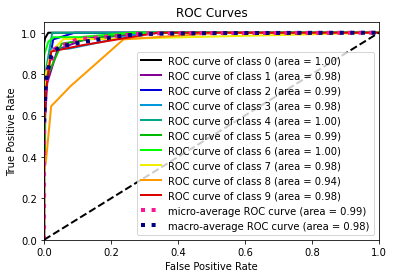

In [19]:
variate_max_samples(range(1,100), [True, False], X_digits_train, y_digits_train, X_digits_test, y_digits_test)
clf_True = BaggingClassifier(max_samples=100, random_state=42, bootstrap=True).fit(X_digits_train, y_digits_train)
clf_False = BaggingClassifier(max_samples=100, random_state=42, bootstrap=False).fit(X_digits_train, y_digits_train)

print("-------- True bootstrap ---------")
print("-------- Train")
estimate(clf_True, X_digits_train, y_digits_train, 10, 1)
print("-------- Test")
estimate(clf_True, X_digits_test, y_digits_test, 10, 1)
print("-------- False bootstrap ---------")
print("-------- Train")
estimate(clf_False, X_digits_train, y_digits_train, 10, 1)
print("-------- Test")
estimate(clf_False, X_digits_test, y_digits_test, 10, 1)

Як бачимо, чим ***більше*** кількість вибірок, тим краще результати, проте це також впливає на час та кількість памяті, які потрібні для розрахунку. Такаж з метрик якості бачимо, що трохи кращі результати при  bootstrap=**True**, тобто *беггінг краще за вставка*.

### 7. Побудувати ансамблi Bagging на основi найпростiших моделей:
*-В якостi base_estimator / estimators використати одну/ декiлька найпростiших моделей заданих за варiантом: дерев рiшень, svm, нейронних мереж тощо. Порiвняти значення мiри R2 для ансамблiв та окремих моделей, якi утворюють ансамбль(модель base_estimator / моделi estimators). Порiвняти декiлька ансамблiв, якi утворенi на основi одних estimators i вiдрiзняються значеннями параметрiв.*

Візьмемо базові моделі DecisionTreeClassifier та MLPRegressor

In [20]:
from sklearn.tree import DecisionTreeClassifier
basic_clf1 = DecisionTreeClassifier(random_state=42)
basic_clf1.fit(X_digits_train, y_digits_train)
print('Default DecisionTreeClassifier:')
print('Test dataset F1 score is',estimate(basic_clf1, X_digits_test, y_digits_test, 10, 0))

basic_clf2 = MLPClassifier(random_state=42)
basic_clf2.fit(X_digits_train, y_digits_train)
print('\nDefault MLPClassifier:')
print('Test dataset F1 score is',estimate(basic_clf2, X_digits_test, y_digits_test, 10, 0))


ens_basic_clf1 = BaggingClassifier(base_estimator=basic_clf1, random_state=42)
ens_basic_clf1.fit(X_digits_train, y_digits_train)
print('\nDefault DecisionTreeClassifier with Bagging:')
print('Test dataset F1 score is',estimate(ens_basic_clf1, X_digits_test, y_digits_test, 10, 0))

ens_basic_clf2 = BaggingClassifier(base_estimator=basic_clf2, random_state=42)
ens_basic_clf2.fit(X_digits_train, y_digits_train)
print('\nDefault MLPClassifier with Bagging:')
print('Test dataset F1 score is',estimate(ens_basic_clf2, X_digits_test, y_digits_test, 10, 0))

Default DecisionTreeClassifier:
Test dataset F1 score is 0.8638888888888889

Default MLPClassifier:
Test dataset F1 score is 0.9833333333333333

Default DecisionTreeClassifier with Bagging:
Test dataset F1 score is 0.9444444444444444

Default MLPClassifier with Bagging:
Test dataset F1 score is 0.9805555555555555


Як можно побачити, покращення є але дуже не значне.

*- В задачах класифiкацiї побудувати графiки залежностi значень мiри якостi вiд значення n_estimators для ансамблiв та iндивiдуальних моделей на однiй координатнiй вiсi. В якостi мiри якостi можна обрати accuracy_score, F1 score або zero_one_loss. Графiки для iндивiдуальних моделей, очевидно, будуть горизонтальними прямими.*

In [21]:
def variate_n_estimators(model,model_title, n_estimators, X_train, Y_train, X_test, Y_test):
    _, axes = plt.subplots(1, len(model_title), figsize=(15, 5))
    axes = list(axes)

    for model, axis, model_title in zip(model, axes, model_title):
        lr_hist_train, lr_hist_test = [], []
        for i in n_estimators:
            ens = BaggingClassifier(n_estimators=i, random_state=42, base_estimator=model)
            ens.fit(X_train, Y_train)
            y_pred = ens.predict(X_test)
            lr_hist_test.append(ens.score(X_test, Y_test))
            lr_hist_train.append(ens.score(X_train, Y_train))
        axis.set_title(f'{model_title}', size='large')
        axis.plot(n_estimators, lr_hist_train, c='r', label='train')
        axis.plot(n_estimators, lr_hist_test, c='b', label='test')
        axis.set_xlabel('n_estimators')
        axis.set_ylabel('score')
        axis.legend()

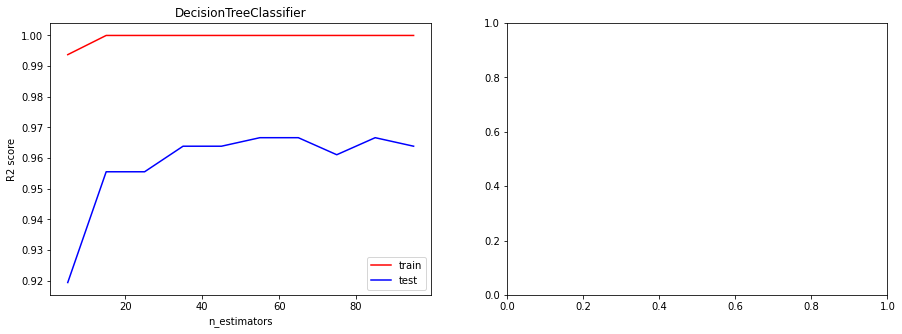

In [22]:
model_title =['DecisionTreeClassifier', 'MLPClassifier']
variate_n_estimators([basic_clf1],  model_title, range(5,101,10),X_digits_train, y_digits_train, X_digits_test, y_digits_test)

З графіків видно, що якість не сильно залежить від кількості апроксиматорів, вона коливається навколо оптимального значення і не відступає від нього. Тобто значення за замовчуванням n_estimators=25, буде за звичай достатньо

### обудувати ансамблi на основi найкращої моделi / моделей нейронних мереж, знайдених на попереднiх етапах даної роботи, та найкращої моделi / моделей, знайдених у роботi No2.

In [23]:

from sklearn.linear_model import LogisticRegression


basic_clf1 = LogisticRegression(random_state=42)
basic_clf1.fit(X_digits_train, y_digits_train)
print('Default LogisticRegression:')
print('Test dataset F1 score is',estimate(basic_clf1, X_digits_test, y_digits_test, 10, 0))

basic_clf2 = MLPClassifier(activation='identity',max_iter=10,random_state=42)
basic_clf2.fit(X_digits_train, y_digits_train)
print('\nDefault MLPClassifier:')
print('Test dataset F1 score is',estimate(basic_clf2, X_digits_test, y_digits_test, 10, 0))


ens_basic_clf1 = BaggingClassifier(base_estimator=basic_clf1, random_state=42)
ens_basic_clf1.fit(X_digits_train, y_digits_train)
print('\nDefault LogisticRegression with Bagging:')
print('Test dataset F1 score is',estimate(ens_basic_clf1, X_digits_test, y_digits_test, 10, 0))

ens_basic_clf2 = BaggingClassifier(base_estimator=basic_clf2, random_state=42)
ens_basic_clf2.fit(X_digits_train, y_digits_train)
print('\nDefault MLPClassifier with Bagging:')
print('Test dataset F1 score is',estimate(ens_basic_clf2, X_digits_test, y_digits_test, 10, 0))


Default LogisticRegression:
Test dataset F1 score is 0.9722222222222222

Default MLPClassifier:
Test dataset F1 score is 0.9305555555555556

Default LogisticRegression with Bagging:
Test dataset F1 score is 0.9694444444444444

Default MLPClassifier with Bagging:
Test dataset F1 score is 0.9444444444444444


**Спробувати пiдiбрати значення гiперпараметрiв ансамблiв, використовуючи
решiтчатий пошук.**

Tuned parameters for Bagging: {'bootstrap': True, 'n_estimators': 10}
Tuned LogisticRegression with Bagging Model:
Precision-score:  0.9930410577592206
Recall-score:  0.9930410577592206
F1-score:  0.9930410577592206
Precision-score:  0.9694444444444444
Recall-score:  0.9694444444444444
F1-score:  0.9694444444444444


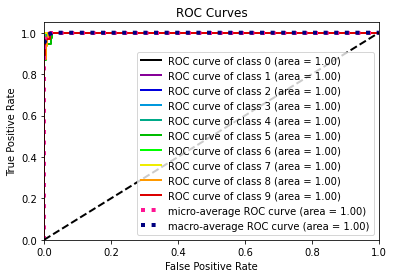

In [24]:

params = {
    'bootstrap': [False, True],
    'n_estimators': [1, 10, 20, 100]
}

ens_grid1 = GridSearchCV(BaggingClassifier(base_estimator=basic_clf1, random_state=42), params, cv=10,)
ens_grid1.fit(X_digits_train, y_digits_train)
print(f'Tuned parameters for Bagging: {ens_grid1.best_params_}')
ens_adv_rgr1 = ens_grid1.best_estimator_
print('Tuned LogisticRegression with Bagging Model:')
estimate(ens_adv_rgr1, X_digits_train, y_digits_train, 10, 1)
estimate(ens_adv_rgr1, X_digits_test, y_digits_test, 10, 1)


Tuned parameters for Bagging: {'bootstrap': False, 'n_estimators': 20}
Tuned LogisticRegression with Bagging Model:
Precision-score:  0.9547668754349339
Recall-score:  0.9547668754349339
F1-score:  0.9547668754349339
Precision-score:  0.9472222222222222
Recall-score:  0.9472222222222222
F1-score:  0.9472222222222222


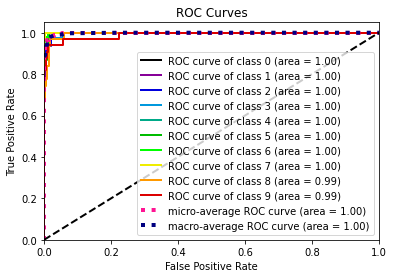

In [25]:

ens_grid1 = GridSearchCV(BaggingClassifier(base_estimator=basic_clf2, random_state=42), params, cv=10,)
ens_grid1.fit(X_digits_train, y_digits_train)
print(f'Tuned parameters for Bagging: {ens_grid1.best_params_}')
ens_adv_rgr1 = ens_grid1.best_estimator_
print('Tuned LogisticRegression with Bagging Model:')
estimate(ens_adv_rgr1, X_digits_train, y_digits_train, 10, 1)
estimate(ens_adv_rgr1, X_digits_test, y_digits_test, 10, 1)

Виконуючи лабораторну роботу я з’ясувала, що для моїх даних надзвичайно добре підходить так MLPClassifier with Bagging Model так і LogisticRegression  попередньо обравши параметри за допомогою GridSearchCV. Адже я отримала значення метрики близьки до 1.Але щодо часу виконання та затрачених ресурсів однозначно лідер LogisticRegression with Bagging Model

### Границі рішень

In [26]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.base import clone

import pandas as pd
def Decision_boundaries(basic_clf1, basic_clf2,model_title1,model_title2):
    X_train_2D = PCA(n_components=2, random_state=17).fit_transform(X_digits_train, y_digits_train) #с помощью метода главных компонент меняем размерность данных до 2 с минимальной потерей информации
    X_train_2D -= np.min(X_train_2D)
    clf_2D_tree = clone(basic_clf1).fit(X_train_2D, y_digits_train) #делаем клон нужной модели, чтобы обучить её на двухмерных данных, с основной моделью так не получится
    clf_2D_mlp = clone(basic_clf2).fit(X_train_2D, y_digits_train)

    fig, axes = plt.subplots(1, 2, figsize=(21, 10))
    fig.suptitle('Decision boundaries', size='xx-large')
    axes[0].set_title(f'{model_title1}', size='x-large')
    plot_decision_regions(X_train_2D, y_digits_train, clf=clf_2D_tree, markers='o', legend=4, ax=axes[0]) #визуализируем границы

    axes[1].set_title(f'{model_title2}', size='x-large')
    plot_decision_regions(X_train_2D, y_digits_train, clf=clf_2D_mlp, markers='o', legend=4, ax=axes[1])

    plt.show()


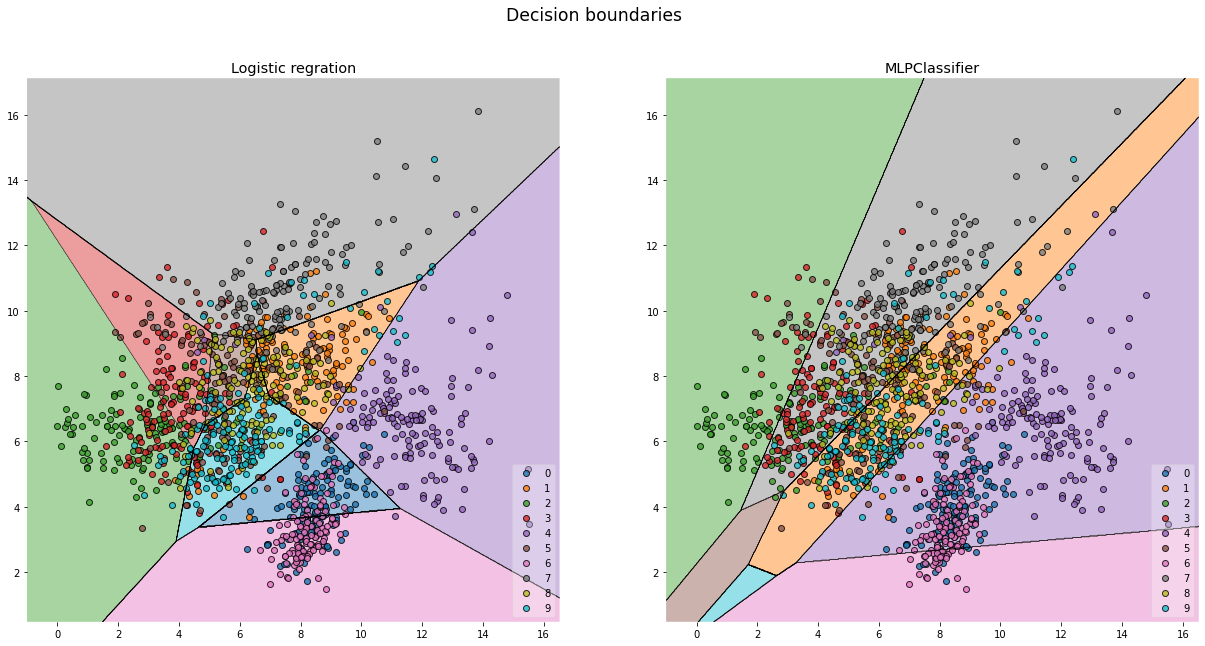

In [31]:
Decision_boundaries(basic_clf1, basic_clf2, 'Logistic regration', 'MLPClassifier')

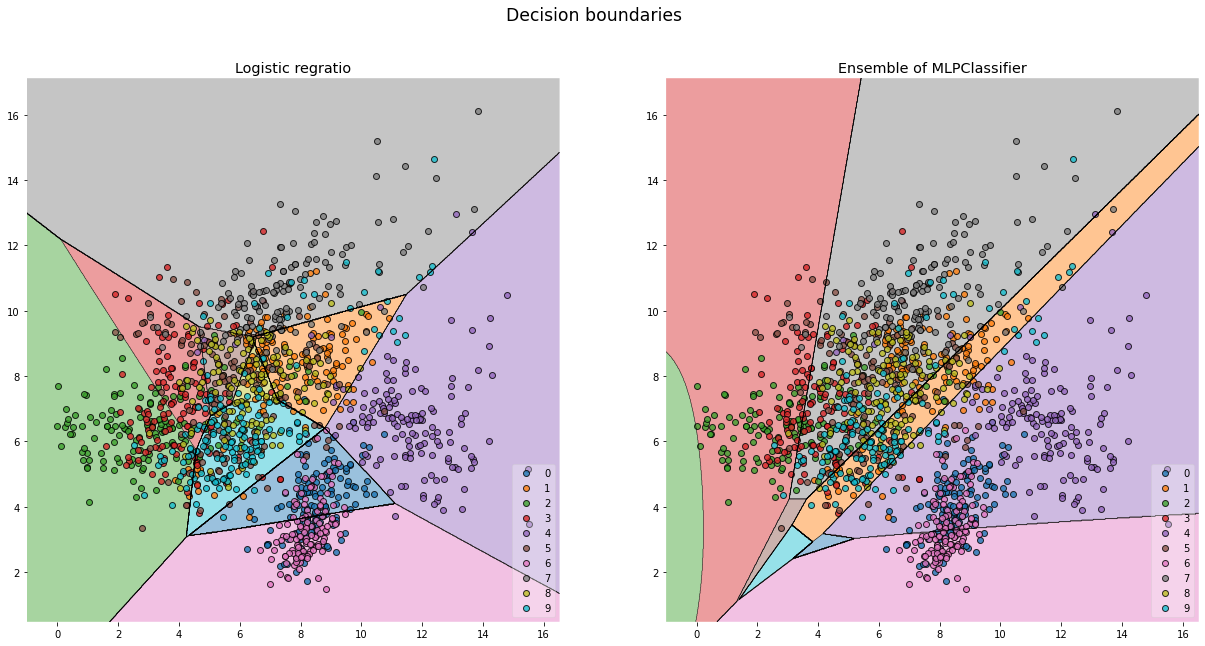

In [32]:
Decision_boundaries(ens_basic_clf1, ens_basic_clf2,'Logistic regratio','Ensemble of MLPClassifier')